In [1]:
import numpy as np
import sim_func as sf
import Extended_Hilbert_transform as ext_ht
import matplotlib.pyplot as plt
plt.rcParams["mathtext.fontset"] ="stix"
plt.rcParams['text.usetex'] = True 
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'
plt.rcParams["font.size"] = 20
color_true = "black"
color_h = "red"
color_p =  "dodgerblue"

# 1. Quasi-periodic modulation

## 1-1. Simulation and Phase Reconstruction
- Generate an osillatory signal
$$
    x(t) = \cos \phi(t),
$$
where 
$$
    \phi (t) = \hat{\omega} t + u(t) \quad  {\rm and} \quad u(t) = b \left(  \sin \sqrt{2}\hat{\omega} t + \cos \sqrt{3}\hat{\omega}t \right). 
$$

- Reconstruct the phase signal from $ x(t) $ via the Hilbert transform (HT) method *phi_h* and the extended Hilbert transform method *phi_p*.

In [2]:
#########  Simulation #########
b = 0.2
omega = 2*np.pi
tau = 0.01
T = 30
tspan=np.arange(0.0, T, tau) 
phi, x = sf.x_QuasiPeriodic(tspan, omega, b) 

#########  Phase reconstruction #########
phi_p, phi_h = ext_ht.phase_reconst(x, tau) 


## 1-2. Visualization

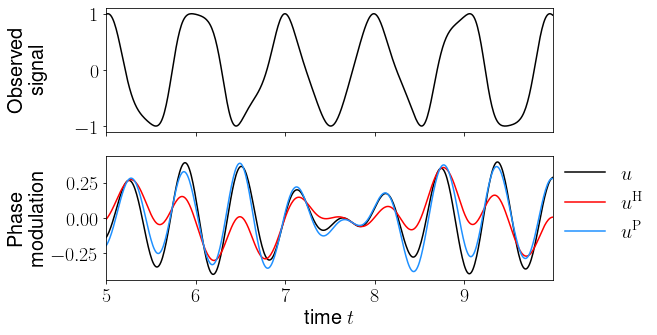

In [3]:
fig, (ax1, ax2)= plt.subplots(2,1, figsize=(8,5), sharex=True)

N = len(phi_p[0]) 
phi_resize = phi[:, (len(phi[0]) - N) :] - 2*np.pi*round(phi[0, (len(phi[0]) - N)] / (2*np.pi))#Cut the true phi signal so that it has the same length as that of phi_p and phi_h
x_resize = x[:, (len(phi[0]) - N) :] 
tspan = np.arange(N)*tau

u_true = phi_resize - tspan.reshape(1, N)*omega
u_h = phi_h - tspan.reshape(1, N)*omega
u_p = phi_p - tspan.reshape(1, N)*omega

ax2.set_xlabel("time $t$")
ax1.set_ylabel("Observed \n signal ")
ax2.set_ylabel("Phase \n modulation ")

start, end = 500, 1000 #plot range
ax1.plot(tspan[start:end], x_resize[0][start:end], color=color_true)
ax2.plot(tspan[start:end], u_true[0][start:end], color=color_true, label=r"$u$")
ax2.plot(tspan[start:end], u_h[0][start:end], color=color_h, label=r"$u^{\rm H}$")
ax2.plot(tspan[start:end], u_p[0][start:end], color=color_p, label=r"$u^{\rm P}$")
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles, labels,  bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0, frameon=False)
ax1.set_xmargin(0)
ax2.set_xmargin(0)

fig.align_labels()
plt.show()

# 2. Ornstein-Uhlenbeck type modulation

## 2-1. Simulation and phase reconstruction
- Generate an osillatory signal
$$
    x(t) = \cos \phi(t),
$$
where 
$$
    \phi (t) = \hat{\omega} t + u(t) \quad  {\rm and} \quad \frac{du(t)}{dt} = - ku(t) + \sigma \eta(t), 
$$
where the $\eta(t)$ is the Gaussian white noise with zero mean and unit variance.

- Reconstruct the phase signal from $ x(t) $ via the Hilbert transform (HT) method *phase_h* and the extended Hilbert transform method *phase_p*.

In [4]:
#########  Simulation #########
k=2.0 
sigma = 0.2
omega = 2*np.pi
tau = 0.01
T = 30
tspan=np.arange(0.0, T, tau) 
phi, x = sf.x_OU(tspan, omega, k, sigma) 

#########  Phase reconstruction #########
phi_p, phi_h = ext_ht.phase_reconst(x, tau) 


## 2-2. Visualization

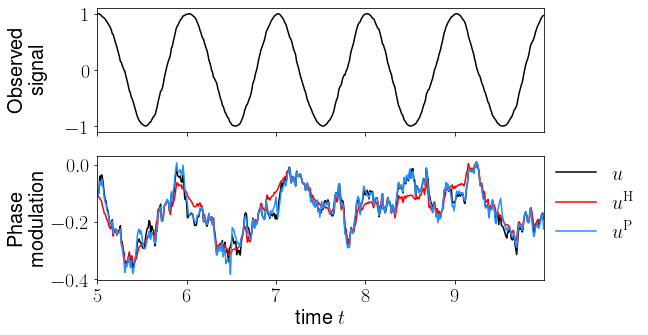

In [5]:
fig, (ax1, ax2)= plt.subplots(2,1, figsize=(8,5), sharex=True)

N = len(phi_p[0]) 
phi_resize = phi[:, (len(phi[0]) - N) :] - 2*np.pi*round(phi[0, (len(phi[0]) - N)] / (2*np.pi))#Cut the true phi signal so that it has the same length as that of phi_p and phi_h
x_resize = x[:, (len(phi[0]) - N) :] 
tspan = np.arange(N)*tau

u_true = phi_resize - tspan.reshape(1, N)*omega
u_h = phi_h - tspan.reshape(1, N)*omega
u_p = phi_p - tspan.reshape(1, N)*omega

ax2.set_xlabel("time $t$")
ax1.set_ylabel("Observed \n signal ")
ax2.set_ylabel("Phase \n modulation ")

start, end = 500, 1000 #plot range
ax1.plot(tspan[start:end], x_resize[0][start:end], color=color_true)
ax2.plot(tspan[start:end], u_true[0][start:end], color=color_true, label=r"$u$")
ax2.plot(tspan[start:end], u_h[0][start:end], color=color_h, label=r"$u^{\rm H}$")
ax2.plot(tspan[start:end], u_p[0][start:end], color=color_p, label=r"$u^{\rm P}$")
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles, labels,  bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0, frameon=False)
ax1.set_xmargin(0)
ax2.set_xmargin(0)

fig.align_labels()
plt.show()

# 3. Phase shift

## 3-1. Simulation of phase shift
- Generate an osillatory signal
$$
    x(t) = \cos \phi(t),
$$
where 
$$
    \phi (t) = \hat{\omega}_1  t + u(t) 
$$
and
$$
    \frac{du}{dt} = \sigma \eta(t) \quad {\rm for} \quad t \notin [T_c, T_c+ \Delta_T],
$$
$$
    \frac{du}{dt} = (\hat{\omega}_2 - \hat{\omega}_1) +  \sigma \eta(t) \quad {\rm for} \quad t \in [T_c, T_c+ \Delta_T],
$$
where the $\eta(t)$ is the Gaussian white noise with zero mean and unit variance.

- Reconstruct the phase signal from $ x(t) $ via the Hilbert transform (HT) method *phase_h* and the extended Hilbert transform method *phase_p*.

In [6]:
#########  Simulation #########
omega1 = 2*np.pi
omega2 = 2*np.pi + 2.5
sigma = 0.1
tau = 0.01
DeltaT = 0.2
Tc = 5.0
T = 10.0
tspan1 = np.arange(0.0, Tc+tau, tau)
tspan2 = np.arange(Tc, Tc+DeltaT+tau, tau)
tspan3 = np.arange(Tc+DeltaT, T, tau)

#tspan=np.arange(0.0, T, tau) 
phi, x = sf.x_PhaseShift(tspan1, tspan2, tspan3, omega1, omega2, sigma, max_cut_len=100) 

#########  Phase reconstruction #########
phi_p, phi_h = ext_ht.phase_reconst(x, tau, max_cut_len=100) 



## 3-2. Visualization

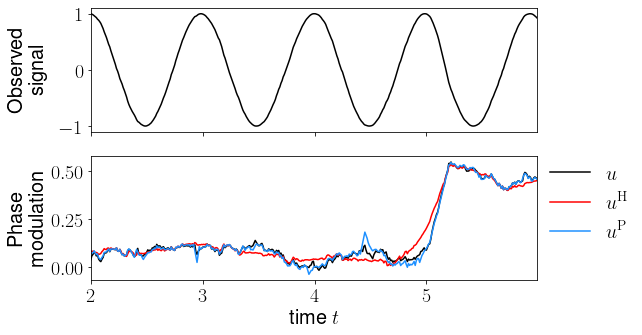

In [7]:
fig, (ax1, ax2)= plt.subplots(2,1, figsize=(8,5), sharex=True)

N = len(phi_p[0]) 
phi_resize = phi[:, (len(phi[0]) - N) :] - 2*np.pi*round(phi[0, (len(phi[0]) - N)] / (2*np.pi))#Cut the true phi signal so that it has the same length as that of phi_p and phi_h
x_resize = x[:, (len(phi[0]) - N) :] 
tspan = np.arange(N)*tau

u_true = phi_resize - tspan.reshape(1, N)*omega
u_h = phi_h - tspan.reshape(1, N)*omega
u_p = phi_p - tspan.reshape(1, N)*omega

ax2.set_xlabel("time $t$")
ax1.set_ylabel("Observed \n signal ")
ax2.set_ylabel("Phase \n modulation ")

start, end = 200, 600 #plot range
ax1.plot(tspan[start:end], x_resize[0][start:end], color=color_true)
ax2.plot(tspan[start:end], u_true[0][start:end], color=color_true, label=r"$u$")
ax2.plot(tspan[start:end], u_h[0][start:end], color=color_h, label=r"$u^{\rm H}$")
ax2.plot(tspan[start:end], u_p[0][start:end], color=color_p, label=r"$u^{\rm P}$")
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles, labels,  bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0, frameon=False)
ax1.set_xmargin(0)
ax2.set_xmargin(0)

fig.align_labels()
plt.show()